<a href="https://colab.research.google.com/github/GeniusGun/tf/blob/master/pandas/pandas01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/doit_pandas-master/data/gapminder.tsv', sep = '\t')   # 갭마인더데이터 불러오기

print(df.head())    # 상위5개 데이터
print('-'*90)
print(type(df))     # 자료형 확인
print('-'*90)
print(df.shape)     # 행과 열의 크기정보
print('-'*90)
print(df.columns)   # 데이터프레임의 열정보
print('-'*90)
print(df.dtypes)    # 각각의 열과 데이터프레임에 대한 정보
print('-'*90)
print(df.info())    # 데이터프레임의 정보

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
------------------------------------------------------------------------------------------
(1704, 6)
------------------------------------------------------------------------------------------
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
------------------------------------------------------------------------------------------
country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dty

### **판다스와 파이썬 자료형 비교**
```
판다스 자료형     파이썬 자료형     설명 
------------------------------------------
object            string            문자열
int64             int               정수
float64           float             실수
datetime64        datetime          파이썬 표준 라이브러리인 datatime이 반환하는 자료형
```

# 01-2 데이터 추출하기
> 지금까지 데이터 프레임의 크기와 자료형을 살펴보는 방법에 대해 알아 보았습니다. 앞에서 head 매서드를 이요해 데이터 프레임에서 가장 앞에있는 5개의 데이터를 추출하여 출력했던 것을 기억하나요? 이번에는 데이터 프레임에서 데이터를 열 단위로 추출하는 방법과 행 단위로 추출하는 방법을 알아 보겠습니다. 먼저 열 단위로 데이터를 추출하는 방법을 알아 보겠습니다. 

## [1] 열단위 데이터 추출하기
>데이터 프레임에서 데이터를 열 단위로 추출하려면 대괋로와 열 이름을 사용해야 합니다. 이때 꼭 열 이름은 작은 따옴표를 사용해서 지정해야 하고 추출한 열은 변수에 저장해서 사용할 수도 있습니다. 이때 1개의 열만 추출하면 시리즈를 얻을 수 있소 2개 이상의 열을 추출하면 데이터프레임을 얻을 수 있습니다.

### (1) 열단위로 데이터 추출하기


####_1._ 
> 다음은 데이터프레임(df)에서 열이름이 country인 열을 추출하며 county_df에 저장한 것입니다. type 매서드를 이용하면 country_df에 저장된 데이터의 자료형이 시리즈라는 것을 확인할 수 있습니다. 시리즈도 head, tail 메서드를 가지고 있기 때문에 head, tail 메서드로 가장 앞이나 뒤에 있는 5개의 데이터를 출력할 수 있습니다.

In [4]:
country_df = df['country']
print(type(country_df))
print('-'*50)
print(country_df.head())
print('-'*50)
print(country_df.tail())

<class 'pandas.core.series.Series'>
--------------------------------------------------
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
--------------------------------------------------
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


####_2._ 
> 리스트에 열 이름을 전달하면 여러개의 열을 항번에 추출할 수 있습니다. 가음은 열 이 름이  country, continent, year인 열을 추출하여 변수 subset에 저장한 것입니다. 이때 1개의 열이 아니라 2개 이상의 열을 추출했기 때문에 시리즈가 아니라 데이터프레임을 얻을 수 있습니다.

In [5]:
subset = df[['country', 'continent', 'year']]
print(type(subset))
print('-'*50)
print(subset)
print('-'*50)
print(subset.head())
print('-'*50)
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>
--------------------------------------------------
          country continent  year
0     Afghanistan      Asia  1952
1     Afghanistan      Asia  1957
2     Afghanistan      Asia  1962
3     Afghanistan      Asia  1967
4     Afghanistan      Asia  1972
...           ...       ...   ...
1699     Zimbabwe    Africa  1987
1700     Zimbabwe    Africa  1992
1701     Zimbabwe    Africa  1997
1702     Zimbabwe    Africa  2002
1703     Zimbabwe    Africa  2007

[1704 rows x 3 columns]
--------------------------------------------------
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
--------------------------------------------------
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


## [2] 행단위 데이터 추출하기
>이번에는 데이터를 행 단위로 추출하는 방법에 대해 알아 보겠습니다.  데이터를 행 단위로 추출하려면 loc, iloc 속성을 사용해야 합니다. 아래는 두 속성을 간단하게정리한 표 입니다.
>
>```
>속성    설명
>-----------------------------------------
>loc     인덱스를 기준으로 행 데이터 추출 
>iloc    행 번호를 기준으로 행 데이터 추출
>```
>표의 설명을 보면 인덱스 와 행 번호라는 것이 있습니다. 파이썬을 공부한 독자라면 리스트 같은 자료형에 저장된 데이터의 순서를 인덱스라고 알고 있습을 겁니다. 하지만 판다스에서는 이런 개념을 행 번로 하고 부릅니다.(판다스에서 인덱스는 조금 다른 의미로 사용됩니다.) 다음 예제를 실습하면서 판다스에서 말하는 인덱스와 행 번호가 무엇인지 알아보겠습니다.

## [3] 인덱스와 행 번호 개념 알아보기
>다은은 갭마인더 데이터 집합을 불러온 다음 head 메서드를 실행한 결과입니다.
```
       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
```
왼쪽의 번호가 보이나요? 바로 이것이 인덱스입니다. 인덱스는 보통 0부터 시작하지만 행데이터가 추가, 삭제되면 언제든지 변할 수 있으며 숫자가 아니라 문자열을 사용할 수도 있습니다. 즉, 인덱스는 first, second, third 같은 문자열로 지정할 수도 있습니다. 반면에 행 번호는 데이터의 순서에 따라가기 때문에 정수만으로 데이터를 조회하거나 추출할 수 있으며 실제 데이터프레임에서는 확인할 수 없 없는 값입니다.


### (1) loc 속성으로 행 데이터 추출하기

####_1._
> loc속성에 대괄호를 이용하여 인덱스를 전달하면 행 데이터를 추출할 수 있습니다. 다음은 인덱스가 0인 행 데이터를 추출한 것입니다. 만약 -1과 같이 인덱스에 없응 값을 가용하면 오류가 발생하니 주의 하세요.

In [6]:
print(df.loc[0])
print('-'*30)
print(df.loc[99])
# print(df.loc[-1])     # error

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
------------------------------
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


####_2._
> 만약 데이터프레임의 마지막 행 데이터를 추출하려면 어떻게 해야 할싸요? 마지막 행 데이터의 인덱스를 알아내야 합니다. shape[0]에 행 크기가 (1704)가 저장되어 있다응 점을 이용하여 마지막 행의 인덱스를 구하면 됩니다. 다음은 shape[0]에서 1을 뺀 값으로 (1704 - 1 = 1703) 마지막 행 데이터를 추출한 것입니다.

In [7]:
number_of_rows = df.shape[0]        # shape[0] : 행 갯수, shape[1] : 열 갯수
last_row_index = number_of_rows - 1
print(df.loc[last_row_index])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


####_3._
> 데이터프레임의 마지막 행 데이터를 추출하는 또 다른 방법으로는  tail메서드를 사용하는 방법이 있습니다. 다음과 같이 tail메서드의 인자 n에 1을 전달하면 마지막 행의 데이터를 추출할 수 있습니다. (2를 전달하면 2개의 데이터를 추출할 수 있습니다) 이방법이 조금 더 유용하겠죠?

In [8]:
print(df.tail(n = 1))

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


4. 만약 인덱스가 0, 99, 999인 데이터를 한 번에 추출하려면 리스트에 원하는 인덱스를 담아 loc 속성에 전달하면 됩니다.

In [9]:
print(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


#### _+_ 알아두면 좋아요!
>tail 메서드와 loc 속성이 반환하는 자료형은 서로 달라요!
>
>tail 메서드와 loc 속성이 반환하는 데이터의 자료형인 다릅니다. 다음은 tail 메서드와 loc 속성으로 출력한 데이터의 자료형을 type메서드로 확인 한 것입니다. loc 속성이 반환한 데이터 자료형은 시리즈 이고, tail 메서드가 반환한 데이터 자료형은 데이터프레임 입니다.

In [10]:
subset_loc = df.loc[0]
subset_tail = df.tail(n = 1)

print(type(subset_loc))
print(type(subset_tail))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### (2) iloc 속성으로 행 데이터 추출하기

#### _1._
> 이번에는 iloc 속성으로 행 데이터를 추출하는 방법에 대해 알아보겠습니다. loc 속성은 대아터프레임의 인덱스를 사용하여 데이터를 추출했지만 iloc 속성은 데이터 순서를 의미하는 행 번호를 사용하여 데이터를 추출합니다. 지금은 인덱스와 행 번호가 동일하여 동일한 결과값이 출력됩니다. 다음은 iloc 속성에 1을 전달하여 데이터를 추출한 것입니다.

In [11]:
print(df.iloc[1])
print('-'*30)
print(df.iloc[99])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object
------------------------------
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


#### _2._ 
>iloc 속성은 음수를 사용해도 데이터를 추출할 수 있습니다. 다음은 -1을 전달하여 마지막 행 데이터를 추출한 것입니다. 하지만 데이터프레임에 아예 존재하지 않는 행 번호를 전달하면 오류가 발생합니다.

In [12]:
print(df.iloc[-1])          #iloc 속성은 -1을 사용하여 마지막 행 데이터를 추출할 수 있습니다.
# print(df.iloc[1710])      # error

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


#### _3._ 
>iloc 속성도 여러 데이터를 한 번에 추출할 수 있습니다. loc 속성을 사용했던 것처럼 원하는 데이터의 행 번호를 리스트에 담아 전달하면 됩니다.

In [13]:
print(df.iloc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


## [4] loc, iloc 속성 자유자재로 사용하기
>loc, iloc 속성을 좀 더 자유자재로 사용하려면 추출할 데이터의 행과 열을 지정하는 방법을 알아야 합니다. 두 속성을 모두 추출할 데이터의 행을 먼저 지정하고 그런 다음 열을 지정하는 방법으로 데이터를 추출합니다. 즉,  df.loc[[행], [열]]이나 df.iloc[[행], [열]]과같은 방법으로 코드를 작성하면 됩니다.
>
>이때 행과 열을 지정하는 방법은 슬라이싱 구문을 사용하는 방법과 range 메서드를 사용하는 방법이 있습니다. 먼서 슬라이싱 구문으로 원하는 데이터를 추출하는 방법은 알아보겠습니다.

### (1) 데이터 추출하기 - 슬라이싱 구문, range 메서드

#### _1._ 슬라이싱 구문으로 데이터 추출하기
>다음은 모든 행(:) 데이터에 대해 year, pop 열을 추출하는 방법입니다. 이때 loc와 iloc 속성에 전달하는 열 지정값은 반드시 형식에 맞게 전달해야 합니다. 예를 들어 loc 속성의 열 지정값에 정수 리스트를 전달하면 오류가 발생합니다. 반대로 iloc 속성에 속성의 열 지정값에 문자열 리스트를 전달하면 오류가 발생합니다.

In [14]:
subset = df.loc[:, ['year', 'pop']]
print(subset.head())

print('-'*30)

subset = df.iloc[:, [2, 4, -1]]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460
------------------------------
   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


#### _2._ range 메서드로 데이터 추출하기
>이번에는 iloc 속성과 내장 메서드인 range를 응용하는 방젖을 알아보겠습니다. range 메서드는 지정한 구간의 정수 리스트를 반환해 줍니다. iloc 속성의 열 지정 값에는 정수 리스트를 전달해야 한다는 점과 range 메서드의 반환값이 정수 리스트인 점을 이용하여 원라는 데이터를 추출하는 것이죠.
>
>그런데 range 메서드는 조금 더 정확하게 말하면 지정한 범위의 정수 리스트를 반환하는 것이 아니라 제네레이터를 반환합니다. iloc 속성은 제네레이터로 데이터 추출을 할 수 없습니다. 다행히 제네레이터는 간단하게 리스트로 변환할 수 있습니다. 다음은 range(5)가 반환한 제네레이터를 정수값을 가진 리스트 [0, 1, 2, 3, 4]로 변환하여 iloc의 열 지정값에 전달한 것입니다. 자주 사용하는 방법은 아니지만 알아두면 유용할 것입니다.

In [15]:
small_range = list(range(5))
print(small_range)
print('-'*50)

print(type(small_range))
print('-'*50)

subset = df.iloc[:, small_range]
print(subset.head())
print('-'*50)

small_range = list(range(3, 6))
print(small_range)
print('-'*50)

subset = df.iloc[:, small_range]
print(subset.head())

[0, 1, 2, 3, 4]
--------------------------------------------------
<class 'list'>
--------------------------------------------------
       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460
--------------------------------------------------
[3, 4, 5]
--------------------------------------------------
   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


####_3._
>range 메서드에 대해서 조금 더 알아보겠습니다. range 메서드에 range(0, 6, 2)와 같은 방법으로 3개의 인자를 전달하면 어떻게 될까요? 0부터 5까지 2만큼 건너뛰는 제네레이터를 생성합니다. 이 제네레이터를 리스트로 변환하면 범위는 0~5이고 짝수로 된 정수 리스트를 얻을수 있습니다.

In [16]:
small_range = list(range(0, 6, 2))
subset = df.iloc[:, small_range]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


#### _4._ 슬라이싱 구문과 range 메서드 비교하기
>그런데 실무에서는 range 메서드 보다는 간편하게 사용할 수 있는 파이썬 슬라이싱 구문을 더 선호합니다. range 메서드가 반환한 제네레이터를 리스트로 변환하는 등의 과정을 거치지 않아도 되기 때문입니다. 예를 들어 list(range(3))과 [:3]의 결과값은 동일합니다.


In [17]:
subset = df.iloc[:, :3]             # 슬라이싱
print(subset.head())

print('-'*32)

small_range = list(range(3))        # range 메서드
subset = df.iloc[:, small_range]
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
--------------------------------
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


#### _5._
>0:6:2를 열 지정값에 전달하면 [ 과정 _3._ ] 에서 얻은 결과값과 동일한 결과값을 얻을 수 있습니다. range 메서드와 슬라이싱 구문을 비교해 보세요.
```
[ 과정 3 ]
small_range = list(range(0, 6, 2))
subset = df.iloc[:, small_range]
print(subset.head())
>
>[ 과정 3 결과 ] 
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460
```


In [18]:
subset = df.iloc[:, 0:6:2]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


#### _6._ loc, iloc 속성 자유자재로 사용하기
>만약 iloc 속성으로 0, 99, 999번째 행의 0, 3, 5번째 열 데이터를 추출하려면 다음과 같이 코드를 작성하면 됩니다.

In [19]:
print(df.iloc[[0, 99, 999], [0, 3, 5]])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


#### _7._
>iloc 속성의 열 지정값으로 정수 리스트를 전달하는 것이 간편해 보일 수 있지만 이렇게 작성한 코드는 나중에 어떤 데이터를 추출하기 위한 코드인지 파악하지 못 할수도 있습니다. 그래서 보통은 다음과 간은 방법으로 loc 속성을 이용하여 열 지정값으로 열 이름을 전달합니다.

In [20]:
print(df.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


#### _8._
>앞에서 배운 내용을 모두 응용하여 데이터를 추출해 보겠습니다. 다음은 인덱스가 10부터 13인 행의 country, lifeExp, gdpPercap 열 데이터를 추출하는 코드입니다.

In [21]:
print(df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']])

        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


# 02-3 기초적인 통계 계산하기
>지금까지는 데이터를 추출하는 방법에 대해 알아보았습니다. 이번에는 추출한 데이터를 가지고 몇 가지 기초적인 통계 계산을 해보겠습니다. 다음은 갭마인더 데이터 집합에서 0~9번째 데이터를 추출하여 출력한 것입니다.

In [22]:
print(df.head(n=10))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360
6  Afghanistan      Asia  1982   39.854  12881816  978.011439
7  Afghanistan      Asia  1987   40.822  13867957  852.395945
8  Afghanistan      Asia  1992   41.674  16317921  649.341395
9  Afghanistan      Asia  1997   41.763  22227415  635.341351


### (1) 그룹화한 데이터의 평균 구하기

#### _1._ lifeExp 열을 연도별로 그룹화하여 평균 계산하기
>예를 들어 연도별 lifeExp 열의 평균을 계산하려면 어떻게 해야 할까요? 데이터를 year열로 그룹화하고 lifeExp 열의 평균을 구하면 됩니다. 다음은 데이터프레임의 groupby 메서드에 year 열을 전잘하여 연도별로 그룹화한 다음 lifeExp 열을 지정하여 mean 메서드로 평균을 구한 것입니다.

In [23]:
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


#### _2._
>[ 과정 1 ]에서 작성한 코드가 조금 복자해 보일수도 있을 것입니다. [ 과정 1 ]에서 작성한 코드를 작은 단위로 나누어 살펴보겠습니다. 먼저 데이터프레임을 연도별로 그룹화한 결과를 살펴보겠습니다. groupby 메서드에 year 열 이름을 전달하면 연도별로 그룹화한 country, continent, ..., gdpPercap 열을 모은 데이터프레임을 얻을 수 있습니다.

In [24]:
grouped_year_df = df.groupby('year')        # 그룹화한 데이터의 자료형은 DataFrameGroupBy 입니다.
print(type(grouped_year_df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


#### _3._
>grouped_year_df를 출력하면 [ 과정 2 ]에서 얻은 데이터프레임이 저장된 메모리의 위치를 알 수 있습니다. 이 결과를 통해 연도별로 그룹화한 데이터는 데이터프레임 형태로 현재 메모리의 [ 0x7f5a4309f4e0 ] 이라는 위치에 저장되어 있음을 알 수 있습니다.
>```
>print(grouped_year_df)
><pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f5a4309f4e0>
># 메모리 주소는 실행 환경에 따라 다르게 출력됩니다.
>```

In [25]:
print(grouped_year_df)

#### _4._
> 이어서 lifeExp 열을 추출한 경과를 살펴보겠습니다. 그룹화한 데이터프레임에서 lifeExp 열을 추출하면 그룹화한 시리즈를 얻을 수 있습니다. 즉, 연도별로 그룹화한 lifeExp열을 얻을 수 있습니다. 

In [27]:
grouped_year_df_lifeExp = grouped_year_df['lifeExp']
print(type(grouped_year_df_lifeExp))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


#### _5._
>마지막으로 평균을 구하는 mean 메서드를 사용한 결과를 살펴보겠습니다. [ 과정 4 ]에서 연도별로 그룹화한 lifeExp에 mean 메서드를 사용했기 때문에 각 연도별 lifeExp 열의 평균겂을 얻을 수 있습니다.

In [28]:
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean()
print(mean_lifeExp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


#### _6._ lifeExp, gdpPercap 열의 평균값을 연도, 지역별로 구룹화하여 한 번에 계산하기
> 다음은 [ 과정 1~4 ]를 응용한 코드 입니다. year, continent 열로 그룹화한 데이터프레임에서 lifeExp, gdpPercap 열만 추출하여 평균값을 구한 것입니다

In [35]:
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var.head(10))
print('-'*40)
print(type(multi_group_var))

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
----------------------------------------
<class 'pandas.core.frame.DataFrame'>


#### _7._ 그룹화한 데이터 개수 세기
>이번에는 그룹화한 데이터의 개수가 몇 개인지 알아보겠습니다. 이를 통계에서는 '빈도수'라고 부릅니다. 데이터의 빈도수는 nunique 메서드를 사용하면 쉽게 구할 수 있습니다. 다음은 continent를 기분으로 데이터프레임을 만들고 country 열만 추출하여 데이터의 빈도수를 계산한 것입니다.

In [36]:
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


# 01-4 그래프 그리기
> 그래프와 같은 데이터의 시각화는 데이터 분석 과정에서 가장 중요한 요소입니다. 데이터를 시각화하면 데이터를 이해하거나 추이를 파악하는 등의 작업을 할 때 많은 도움이 됩니다. 여기에서는 간단한 그래프를 그려보고 데이터 시각화가 무엇인지 알아보겠습니다. 자세한 내용은 03장에서 설명하겠습니다.

### (1) 그래프 그리기

#### _1._
>먼저 그래프와 연관된 라이브러리를 불러옵니다.

In [0]:
%matplotlib inline      
# %matplotlib inline은 주피터 노트북에서 그래프를 그리기 위해 사용하는 매직함수 입니다.
import matplotlib.pyplot as plt

#### _2._
그런 다음 year 열을 기준으로 그룹화한 데이터프레임에서 lifeExp 열만 추출하여 평균으값을 구합니다.

In [40]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


#### _3._
>[ 과정 2 ]에서 구한 값에 plot 메서드를 사용하면 다음과 같은 그래프가 그려집니다.

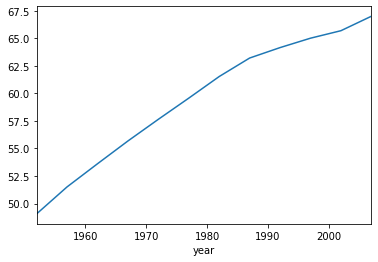

In [41]:
global_yearly_life_expectancy.plot()        # 시간에 따른 평균 생평 예측치를 보여주는 판다스 기본그래프